In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
import seaborn


In [2]:
# Load the temperature dataset as a dataframe
orig_temp_data = pd.read_csv('/Users/michealmccloskey/Desktop/Climate_change_disasters/datasets/GlobalTemperatures.csv')
global_temp_df = orig_temp_data.copy()

global_temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


The global temperature dataset contains monthly data. To streamline analysis, we can aggregate this data to an annual level by calculating the average temperature for each year. The resulting dataset will focus on the yearly 'LandAndOceanAverageTemperature' without sacrificing essential temperature information.

In [3]:
# keep only the required columns
global_temp_df = global_temp_df[['dt', 'LandAndOceanAverageTemperature']]

# Date column as a DateTimeIndex and sort it
global_temp_df['dt'] = pd.to_datetime(global_temp_df['dt'])
global_temp_df.set_index('dt', inplace = True)
global_temp_df.sort_index(axis = 0, inplace = True)

# Resample annually and rename index & columns
global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
global_temp_df.index.rename('Year', inplace = True)
global_temp_df.index = global_temp_df.index.year

In [4]:
global_temp_df.head()

,AnnualAverageTemp
Year,
1750,NaN
1751,NaN
1752,NaN
1753,NaN
1754,NaN


In [5]:
# Check the amount of missing values and the corresponding years
print(global_temp_df.isnull().sum())
print(global_temp_df[global_temp_df['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761,
       1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773,
       1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785,
       1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833,
       1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849],
      dtype='int32', name='Year')


The global temperature dataset contains monthly data from 1750 onwards, however, it appears that temperature values are only available starting from 1850. **Therefore, I will exclude the data prior to 1850** and aggregate the remaining data to an annual level by calculating the average temperature for each year. This will provide a focused dataset on yearly 'LandAndOceanAverageTemperature' for analysis.

In [6]:
global_temp_df.dropna(inplace = True)
global_temp_df.head()

,AnnualAverageTemp
Year,
1850,14.867167
1851,14.991833
1852,15.006500
1853,14.955167
1854,14.991000


To accurately represent temperature patterns, **temperature anomalies** will be calculated instead of using absolute temperature values. An anomaly is the difference between a specific temperature and a baseline. Here, the baseline is the average temperature between 1951 and 1980. By calculating the anomaly for each data point and storing it in a new column, we can effectively analyze temperature changes relative to this baseline, enhancing the understanding of climate trends. The original absolute temperature column will be removed from the dataset.

In [7]:
# Calculate the global baseline temperature
global_ref_temp = global_temp_df.loc['1951':'1980'].mean()['AnnualAverageTemp'] 

# Create the temperature anomaly column
global_temp_df['Temperature Anomaly'] = global_temp_df['AnnualAverageTemp'] - global_ref_temp
global_temp_df.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

global_temp_df.head()

,Temperature Anomaly
Year,
1850,-0.432381
1851,-0.307714
1852,-0.293047
1853,-0.344381
1854,-0.308547


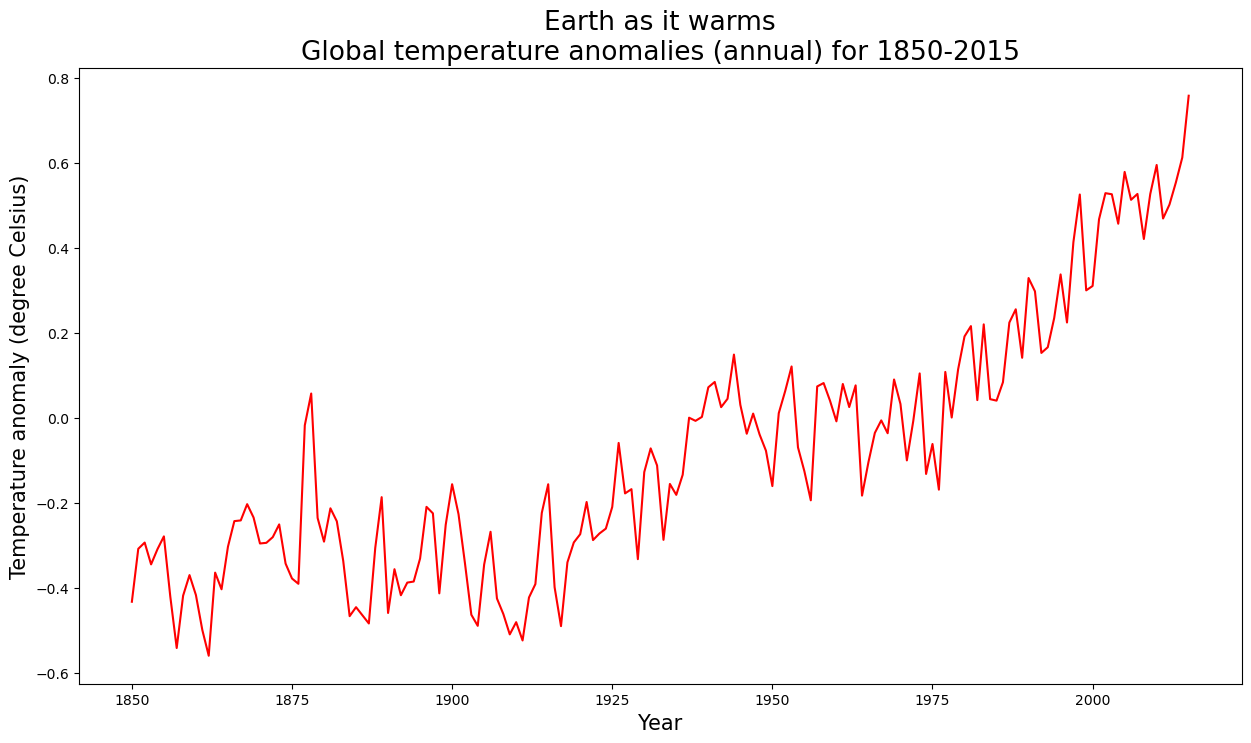

In [8]:
# Plot the temperature anomaly
plt.figure(figsize = (15, 8))

plt.plot(global_temp_df['Temperature Anomaly'], 'r')

plt.title('Earth as it warms\nGlobal temperature anomalies (annual) for 1850-2015', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)

plt.show()

**Findings: A visual representation of temperature anomalies over time clearly illustrates a warming trend, particularly pronounced since the 1920s. The data reveals that in 2015, the global temperature was 0.76 degrees Celsius higher than the 1951-1980 average. These findings align with the established scientific consensus of global warming**



**Natural Disasters**

Let's explore the natural disaster data and analyse how the occurrence of various types of natural disasters has changed over the years.

In [9]:
# Load the natural disaster dataset and store it in a dataframe
orig_disaster_data = pd.read_csv('/Users/michealmccloskey/Desktop/Climate_change_disasters/datasets/number-of-natural-disaster-events.csv')
nat_disaster_df = orig_disaster_data.copy()

nat_disaster_df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


We can see that this data starts from 1900 only

In [10]:
# Remove the 'Code' column
nat_disaster_df.drop(['Code'], axis = 1, inplace = True)

# Check the different types of 'Entity' values
nat_disaster_df['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

To conduct a more granular analysis, the **dataset will be restructured to isolate each of the ten specific natural disaster types** from the combined 'All natural disasters' category. This reorganization will allow for in-depth exploration of individual disaster trends in relation to climate change.

In [13]:
# Pivot the dataframe
nat_disaster_df = nat_disaster_df.pivot(index ='Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
nat_disaster_df.head()



Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Given the assumption that global warming does not significantly influence the occurrence of asteroid or meteorite impacts, it's reasonable to exclude the 'Impact' entity from the analysis. This can be achieved by filtering the DataFrame to remove rows where 'Entity' equals 'Impact'.

In [14]:
# Remove the 'Impact' column
nat_disaster_df.drop(['Impact'], axis = 1, inplace = True)

In [15]:
nat_disaster_df.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [16]:

# Handle missing values and rename columns
nat_disaster_df.fillna(value = 0, inplace = True)
nat_disaster_df = nat_disaster_df.add_suffix(' (Occurrence)')

nat_disaster_df.head()


Entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence)
Year,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


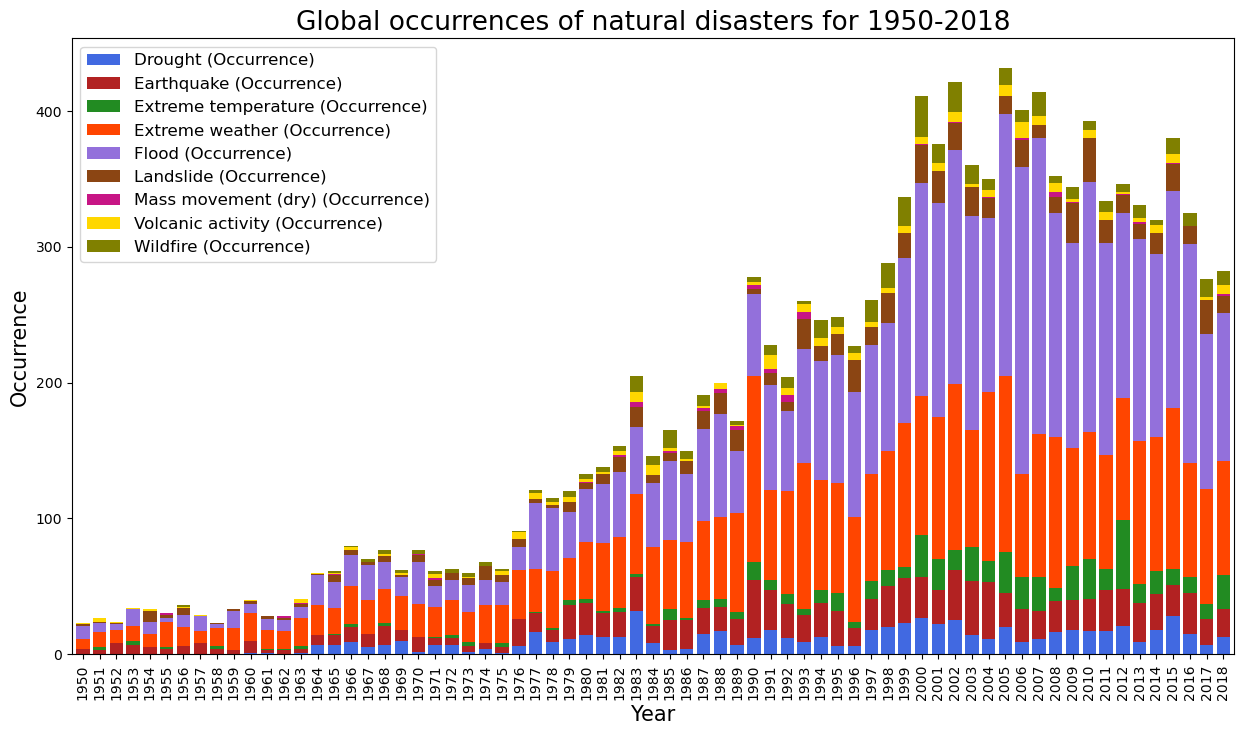

In [17]:
# Plot the types of natural disasters occurrences for 1950-2018
colors = ['#4169e1', '#b22222', '#228b22', '#ff4500', '#9370db', '#8b4513', '#c71585', '#ffd700', 'olive']

nat_disaster_df.drop(['All natural disasters (Occurrence)'], axis = 1).loc[1950:].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Global occurrences of natural disasters for 1950-2018', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Occurrence', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()

The stacked bar chart illustrates a significant increase in flood occurrences over time compared to other disaster categories. Extreme weather events follow as the second most rapidly increasing disaster type, with earthquakes showing a more gradual upward trend. The overall number of global natural disasters has steadily risen, as evidenced by the total disaster count.

I will now plot natural disasters occurrences and temperature anomaly for comparison


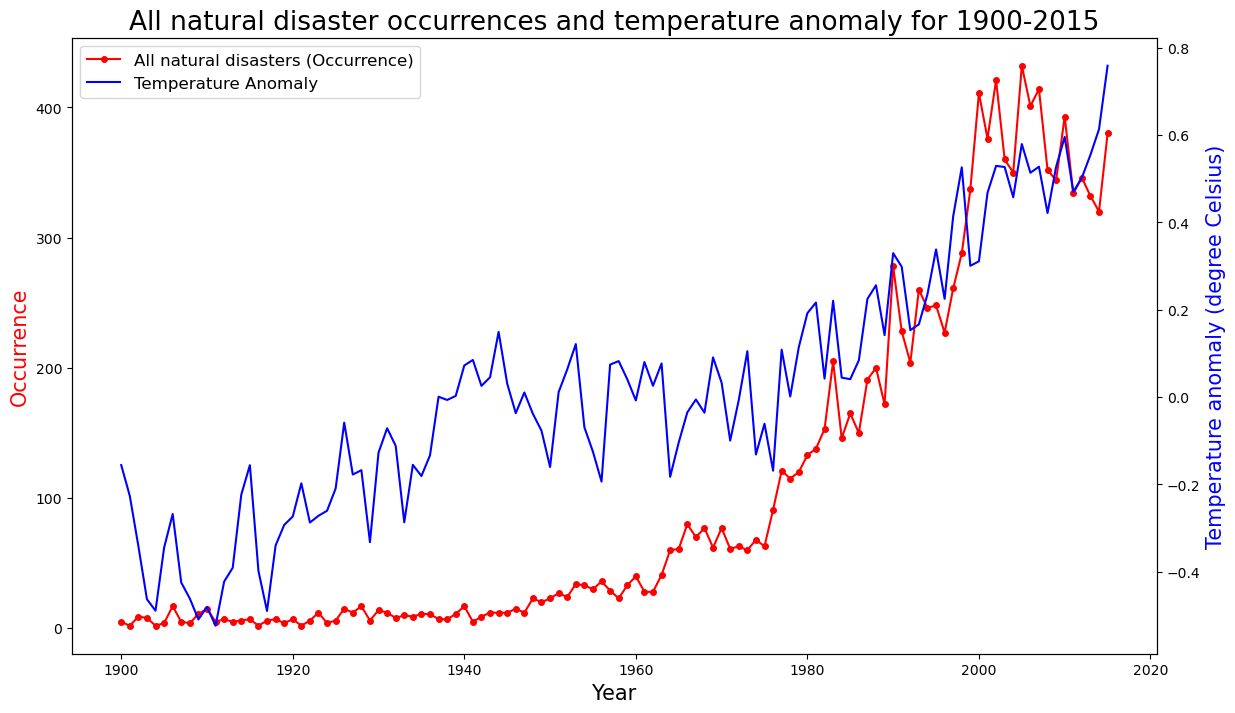

In [18]:
# Plot all natural disasters occurrences and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(nat_disaster_df.loc[:2015, 'All natural disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(global_temp_df.loc[1900:, 'Temperature Anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1900-2015', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

plt.show()

**Findings:The visualization reveals a strong correlation between rising global temperatures and an increased frequency of natural disasters. This relationship becomes particularly evident post-1940 as the planet experiences accelerated warming**


Let's take a look at the economic damage caused by natural disasters



In [21]:
# Load the economic damage dataset and store it in a dataframe
orig_econ_data = pd.read_csv('/Users/michealmccloskey/Desktop/Climate_change_disasters/datasets/economic-damage-from-natural-disasters.csv')
econ_dmg_df = orig_econ_data.copy()

econ_dmg_df.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [22]:
# Remove the 'Code' column
econ_dmg_df.drop(['Code'], axis = 1, inplace = True)

# Pivot the dataframe
econ_dmg_df = econ_dmg_df.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters (US$)')
econ_dmg_df.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,30000000.0,NaN,NaN,NaN,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,480000000.0,NaN,NaN,NaN,NaN,480000000.0,NaN,NaN,NaN,NaN,NaN
1904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Remove the irrelevant columns, rename the other columns and handle the missing values.
econ_dmg_df.drop(['Impact'], axis = 1, inplace = True)

econ_dmg_df.fillna(value = 0, inplace = True)
econ_dmg_df = econ_dmg_df.add_suffix(' (Economic Damage)')

econ_dmg_df.head()



Entity,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,
1900,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


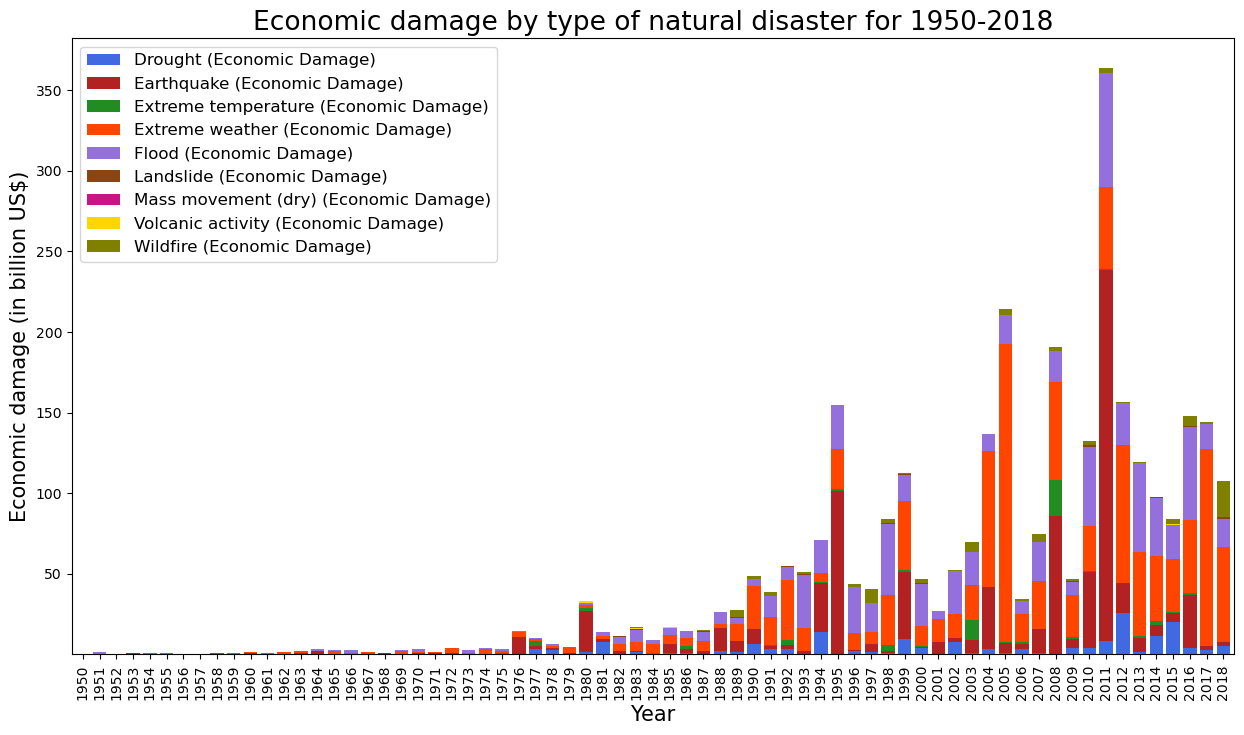

In [24]:
# Plot the economic damage categorised by the type of natural disasters for 1950-2018
((econ_dmg_df.drop(['All natural disasters (Economic Damage)'], axis = 1).loc[1950:]) / 1e9).plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Economic damage by type of natural disaster for 1950-2018', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Economic damage (in billion US$)', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()

**FindingsEconomic damage is highly variable as it depends on several factors such as the disaster type, disaster location, severity of the disaster, disaster management efforts, etc**

**However, one key trend that stands out from the plot is that the total economic damage from all the disasters is generally increasing over the years. The main reason is the increase in disaster occurrences (correlated with global temperature rise), although all disasters don't contribute equally to the economic damage. Another reason for higher economic damage could be the overall increase in economic growth which leads to more infrastructure, land use, etc**


In [28]:
# Combine the three main dataframes (global_temp_df, nat_disaster_df and econ_dmg_df) and create a correlation table to measure the correlation between each entity.
combined_df = global_temp_df.join([nat_disaster_df, econ_dmg_df], how = 'inner')
combined_df.head()


,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,,,,,,,,,,,,
1900,-0.155631,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,-0.226214,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,-0.341214,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,-0.462964,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,...,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,-0.489131,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# plot a correlation table
correlation_table = combined_df.corr()
correlation_table.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Temperature Anomaly,1.000000,0.865128,0.750086,0.796451,0.738191,0.848536,0.841740,0.772180,0.257074,0.669120,...,0.647406,0.515849,0.346882,0.294110,0.588786,0.678628,0.353444,0.010518,0.215112,0.557517
All natural disasters (Occurrence),0.865128,1.000000,0.854789,0.903392,0.859863,0.969517,0.978128,0.894296,0.349152,0.788590,...,0.740809,0.550956,0.400397,0.335689,0.686369,0.759470,0.439097,-0.047811,0.203272,0.624099
Drought (Occurrence),0.750086,0.854789,1.000000,0.815286,0.684009,0.829133,0.785536,0.790511,0.398695,0.710884,...,0.578329,0.583563,0.293073,0.255171,0.525367,0.600423,0.518547,-0.068802,0.251909,0.515664
Earthquake (Occurrence),0.796451,0.903392,0.815286,1.000000,0.721105,0.917687,0.824128,0.778272,0.408753,0.708440,...,0.667560,0.509985,0.394882,0.321490,0.588992,0.663298,0.416438,-0.063196,0.263032,0.538465
Extreme temperature (Occurrence),0.738191,0.859863,0.684009,0.721105,1.000000,0.776985,0.870008,0.751340,0.165342,0.556775,...,0.680193,0.596794,0.316083,0.229073,0.704082,0.657396,0.296600,-0.033887,0.097393,0.569856


**Let's Quantify the Correlation**

Calculating correlation coefficients will provide a quantitative measure of the relationship between temperature anomaly and different types of natural disasters.



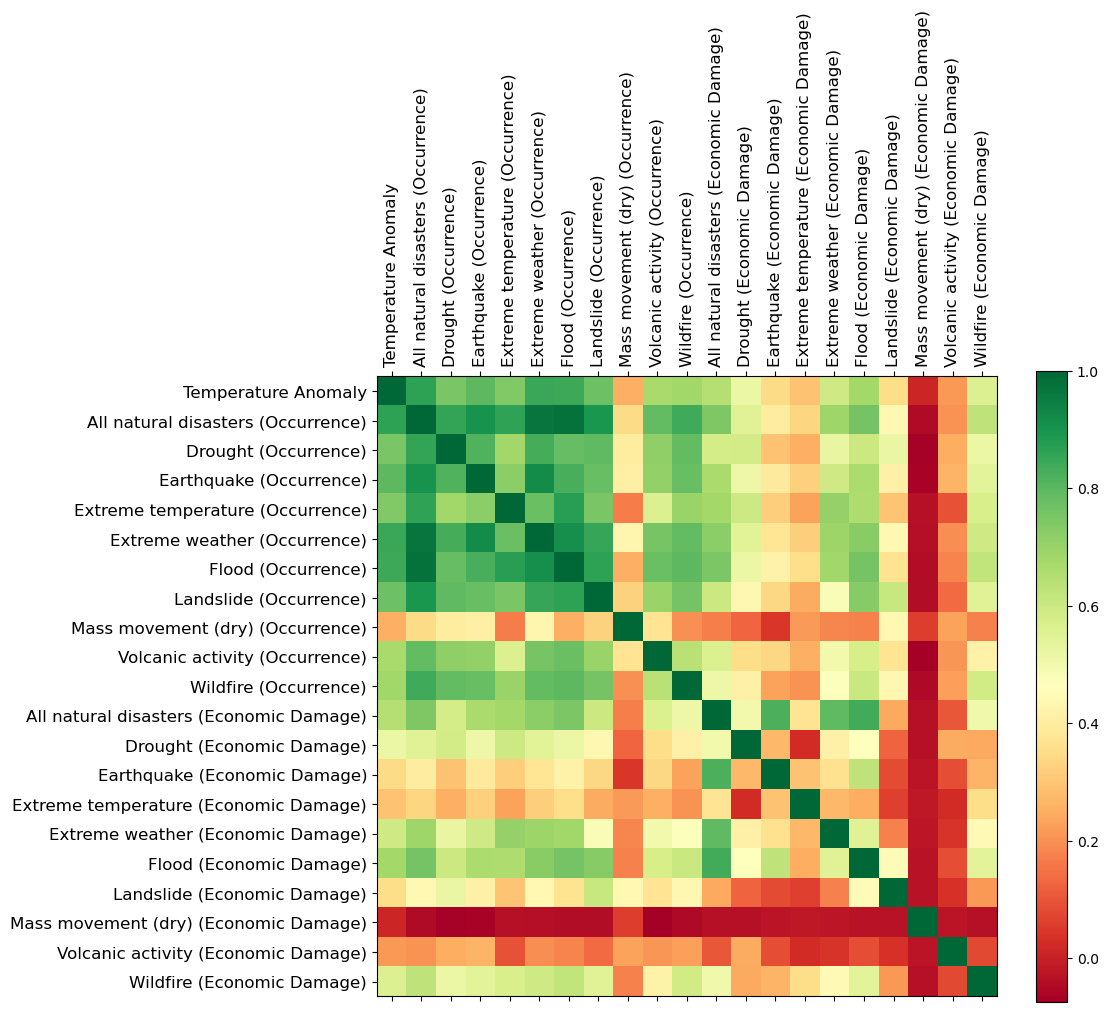

In [27]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]

cax = ax.matshow(correlation_table, cmap = 'RdYlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)

plt.show()

**Findings:The heatmap and correlation analysis provide robust evidence supporting the hypothesis that global temperature rise is significantly correlated with an increase in most natural disaster occurrences**

**The discrepancy in the correlation with economic damage is an interesting observation. It suggests that while the frequency of disasters is influenced by climate change, the economic impact is likely influenced by a complex interplay of factors beyond just climate, such as technological advancements, economic growth, and disaster preparedness**